# Анализ оттока клиентов банка

В данном проекте используются следущие новыки:

- Python,
- Pandas,
- Matplotlib,
- Seaborn,
- классификация,
- A/B-тестирование,
- описательная статистика,
- проверка статистических гипотез.

**План:**
- Проведём предобработку данных и исследовательский анализ данных, в ходе которого определим все значимые признаки отточности.
- Сформулируем и проверим статистические гипотезы, относительно представленных данных, которые помогут внести ясность в исследование.
- Объединяя признаки отточности, сформируем сегменты, отберём из них лучшие и дадим по ним рекомендации.

**Оглавление:**
- [Знакомство c данными](#1.-Знакомство-c-данными)
 - [Импорт библиотек и прочие настройки](#1.1-Импорт-библиотек-и-прочие-настройки)
 - [Загрузка и чтение данных](#1.2-Загрузка-и-чтение-данных)
- [Предобработка данных](#2.-Предобработка-данных)
 - [Корректность наименований столбцов](#2.1-Корректность-наименований-столбцов)
 - [Обработка пропусков](#2.2-Обработка-пропусков)
 - [Корректность типов данных](#2.3-Корректность-типов-данных)
    - [Столбцы с качественными данными](#2.3.1-Столбцы-с-качественными-данными)
    - [Столбцы с количественными данными](#2.3.2-Столбцы-с-количественными-данными)
 - [Обработка дубликатов](#2.4-Обработка-дубликатов)
 - [Распределения и категоризация](#2.5-Распределения-и-категоризация)
     - [Распределения](#2.5.1-Распределения)
     - [Категоризация](#2.5.2-Категоризация)
- [Исследовательский анализ](#3.-Исследовательский-анализ)
 - [Портреты клиентов](#3.1-Портреты-клиентов)
 - [Корреляция](#3.2-Корреляция)
 - [Статистический анализ](#3.3.-Статистический-анализ)
- [Сегментация ](#4.-Сегментация)
- [Выводы и рекомендации](#Выводы-и-рекомендации)
 - [Общие выводы](#Общие-выводы)
 - [Рекомендации](#Рекомендации)
 - [Приложения](#Приложения)

## 1. Знакомство с данными

#### 1.1 Импорт библиотек и прочие настройки

In [1]:
# импортируем библиотеки
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [2]:
# настройки отображения

# формат отображения
pd.set_option('display.max_columns', None)
# предупреждения
warnings.filterwarnings('ignore')
# стиль графиков и шрифтов
plt.style.use("seaborn-whitegrid")
class font:
        BOLD = "\033[1m"
        END = "\033[0m"
color = '#4884af'
palette = 'Blues_r'

#### 1.2 Загрузка и чтение данных

In [4]:
# выводим основную информацию по датафрейму
display(data.info(), data.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
4551,197329,938.0,Ярославль,М,39.0,5,912305.55,2,1,1,178485.29,1
7967,215341,950.0,Ярославль,М,37.0,0,NaN,1,0,1,284816.69,0
3086,205630,855.0,Рыбинск,Ж,45.0,2,574755.13,2,0,1,85116.27,0
8875,130395,929.0,Ярославль,Ж,60.0,0,NaN,1,1,1,469934.64,0
1724,186531,846.0,Рыбинск,Ж,39.0,5,508273.56,2,0,1,89104.40,0
3367,136187,916.0,Ярославль,М,44.0,1,1125916.53,2,1,0,167759.18,0
899,204555,803.0,Ярославль,Ж,47.0,0,105020.53,2,1,1,71774.48,0
5113,169660,782.0,Ярославль,М,38.0,5,528619.75,3,1,1,110193.29,0
577,202624,771.0,Рыбинск,Ж,48.0,3,271765.72,2,0,1,139792.10,0
1116,200452,834.0,Рыбинск,Ж,35.0,5,725677.04,1,1,1,76249.42,0


Представленный датафрейм состоит из 12 столбцов на 10000 строк и содержит информацию о клиентах разных филиалов банка и их признаков. Однако при проверке качества данных были обнаружены пропущенные значения и некорректные типы данных в некоторых столбцах, которые необходимо исправить.

## 2. Предобработка данных

#### 2.1 Корректность наименований столбцов
Скорректируем название столбцов.

In [5]:
# приводим названия к нижнему регистру
data.columns = data.columns.str.lower()
#
data = data.rename(columns = {'userid':'user_id'})
# проверка
list(data.columns)

['user_id',
 'score',
 'city',
 'gender',
 'age',
 'equity',
 'balance',
 'products',
 'credit_card',
 'last_activity',
 'est_salary',
 'churn']

#### 2.2 Обработка пропусков

In [6]:
# выводим долю пропусков в каждом из столбцов датафрейма
pd.DataFrame(
        data.isna().mean() * 100
).style.background_gradient(cmap="Reds", vmax=1)

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.260000
equity,0.000000
balance,22.950000
products,0.000000
credit_card,0.000000
last_activity,0.000000


При проверке данных на пропуски было выявлены пропуски в столбцах age (0.26%) и balance (~23%). Доля пропусков в столбце age очень мала, поэтому их удаление не повлияет на дальнейший анализ. Чем вызваны наличие пропусков в столбце age выясним далее.

In [7]:
# удаляем пропуски в столбце age
data = data.dropna(subset=['age'])
# проверка
pd.DataFrame(
        data.isna().mean() * 100
).style.background_gradient(cmap="Reds", vmax=1)

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,22.849408
products,0.000000
credit_card,0.000000
last_activity,0.000000


Теперь перейдем к детальному рассмотрению пропусков в столбце `balance`.

In [8]:
# создаём срез где в столбце balance только пропуски
nan_balance = data.query('balance.isna() == True')
# проверка
print(nan_balance['balance'].unique())

[nan]


In [9]:
# создаём срез где в столбце balance пропусков нет
positive_balance = data.query('balance > 0')
# проверка
positive_balance['balance'].isna().sum()

0

In [10]:
# смотрим средние значения столбцов без пропусков и с ними
(
    positive_balance
    .drop(['user_id','balance'], axis=1)
    .describe().T[["mean"]].reset_index()
    .merge(
        nan_balance.describe().T[["mean"]].reset_index(), on="index", how="left"
    ).rename(columns={
        "index": "columns",
        "mean_x": "mean",
        "mean_y": "nan_mean"
    })
).style.background_gradient()

,columns,mean,nan_mean
0,score,843.762901,865.357174
1,age,42.930586,42.093023
2,equity,3.395424,0.051338
3,products,2.081243,1.163229
4,credit_card,0.640062,0.815270
5,last_activity,0.515144,0.548925
6,est_salary,124541.272458,226345.417464
7,churn,0.234759,0.005704


Теперь перейдем к детальному рассмотрению пропусков в столбце `balance`.

Проанализировав данную таблицу можно сделать вывод, что пропуски данных о балансе преимущественно у тех клиентов, у которых из продуктов банка оформлена только кредитная карта, баланс которой не относиться к информации в столбце датафрейма balance, так как в этом столбце записана информация о дебетовых счетах. Такую информацию невозможно заменить и удаления такого количества пропусков сильно исказить дальнейшее исследование, поэтому оставляем пропуски как есть. Еще здесь можно увидеть явную взаимосвязь с equity. У клиентов с пропущенным значением в балансе низкий балл собственности.

#### 2.3  Корректность типов данных

Более детально рассмотрим типы данных во всех столбцах датафрейма и их уникальные значения для последующей корректировки.

In [11]:
# выводим информацию о типах данных и уникальные значения столбцов одним блоком
for col in data.columns:
    print(
        font.BOLD,
        f'column: {col}',
        f'type: {data[col].dtypes}',
        font.END,
        (data[col].sort_values().unique()),
         " ",
        sep="\n"
          )


column: user_id
type: int64

[ 94561  94590  95384 ... 229130 229136 229145]
 

column: score
type: float64

[ 642.  646.  648.  649.  650.  651.  652.  653.  654.  655.  656.  657.
  658.  659.  660.  661.  662.  663.  664.  665.  666.  667.  668.  669.
  670.  671.  673.  678.  680.  681.  682.  684.  685.  686.  687.  688.
  689.  690.  691.  692.  693.  694.  695.  696.  697.  698.  699.  700.
  701.  702.  703.  704.  705.  706.  707.  708.  709.  710.  711.  712.
  713.  714.  715.  716.  717.  718.  719.  720.  721.  722.  723.  724.
  725.  726.  727.  728.  729.  730.  731.  732.  733.  734.  735.  736.
  737.  738.  739.  740.  741.  742.  743.  744.  745.  746.  747.  748.
  749.  750.  751.  752.  753.  754.  755.  756.  757.  758.  759.  760.
  761.  762.  763.  764.  765.  766.  767.  768.  769.  770.  771.  772.
  773.  774.  775.  776.  777.  778.  779.  780.  781.  782.  783.  784.
  785.  786.  787.  788.  789.  790.  791.  792.  793.  794.  795.  796.
  797.  798.  

##### 2.3.1 Столбцы с качественными данными

**`user_id`**

In [12]:
# меняем тип данных
data['user_id'] = data['user_id'].astype('str')
# проверка
data['user_id'].sample(10)

9049    139969
7533    153172
6307    177929
1945    197623
3884    138642
3845    148440
7787    139823
6497    141117
6046    156812
1386    128216
Name: user_id, dtype: object

**`city`**

Для того, чтобы вычислить корреляцию по городам, необходимо привести данную информацию в другой вид. Преобразовываем категориальные переменные в фиктивные, которые представляют собой числовые переменные.

In [13]:
# приводим к нижнему регистру
data['city'] = data['city'].str.lower()
# проверка
print(
    data['city'].unique()
)

['рыбинск' 'ярославль' 'ростов']


In [14]:
# копируем инофрмацию столбца
data['city_name'] = data['city']
# проверка
data[['city_name','city']].sample(5)

,city_name,city
1296,ярославль,ярославль
7040,ярославль,ярославль
4085,ростов,ростов
9455,рыбинск,рыбинск
4422,ярославль,ярославль


In [15]:
# создаём столцы с признаками по городам
data = pd.get_dummies(data, columns=['city'])
# переименовываем столбцы
data = (
    data
    .rename(columns = {
        'city_ростов':'rostov',
        'city_рыбинск':'rybinsk',
        'city_ярославль':'yaroslavl'
    })
)
# проверка
data.sample(10)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_name,rostov,rybinsk,yaroslavl
4578,145240,901.0,Ж,69.0,5,1019223.54,2,1,1,29938.48,0,ярославль,0,0,1
8255,207737,875.0,М,51.0,4,811944.23,1,1,0,124713.64,0,ярославль,0,0,1
1866,210435,849.0,Ж,64.0,3,540956.23,2,0,1,57267.59,0,рыбинск,0,1,0
1841,146130,867.0,Ж,25.0,4,275460.26,3,1,0,20524.48,0,рыбинск,0,1,0
7391,174761,845.0,Ж,49.0,2,344115.23,2,1,0,68492.82,1,ростов,1,0,0
8347,141957,845.0,Ж,59.0,3,365016.98,1,1,0,63988.04,0,ростов,1,0,0
8779,145608,977.0,М,55.0,3,447928.61,3,1,1,48742.27,1,ярославль,0,0,1
6287,134421,867.0,Ж,40.0,4,529807.66,2,0,0,190659.14,0,рыбинск,0,1,0
2539,184349,889.0,М,34.0,0,NaN,1,1,1,276308.50,0,ярославль,0,0,1
1895,116362,787.0,М,65.0,1,350938.89,2,1,1,37929.75,0,ярославль,0,0,1


**`gender`**

Для последующих вычислений преобразуем значения в двоичные 1 и 0, где цифрой 1 будут обозначены мужчины, а цифрой 0 - женщины.

In [16]:
# перезаписываем значения в двоичные
data['gender'] = data['gender'].str.replace('Ж', '0').str.replace('М', '1').astype('int')
# проверка
print(
    data['gender'].unique(),
    data['gender'].dtypes,
    sep='\n'
)

[0 1]
int32


**`products`**

In [17]:
# ещё раз проверим уникальные значения
print(data['products'].sort_values().unique())

[0 1 2 3 4 5]


In [18]:
# рассмотрим распределения клиентов по количеству продуктов
data['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

При рассмотрении распределения был обнаружен один клиент с нулевым количеством продуктов. В нашем случае мы проводим анализ по клиентам банка, а человек без единого оформленного продукта таковым не является, поэтому его стоит удалить из датафрейма.

In [19]:
# находим индекс клиента без продуктов
data.query('products == 0').index

Int64Index([8957], dtype='int64')

In [20]:
# удалаяем данного клиента
data = data.drop([8957])
# проверка
print(data['products'].sort_values().unique())

[1 2 3 4 5]


##### 2.3.2 Столбцы с количественными данными

**`score`**

In [21]:
# изменяем тип данных
data['score'] = data['score'].astype('int')
# проверка
data['score'].sample(10)

1665    907
7374    913
45      826
3624    722
9915    782
6346    762
8612    801
2799    908
8955    824
6049    856
Name: score, dtype: int32

In [22]:
# находим минимальное и максимальное значения
data['score'].describe()[['min','max']]

min     642.0
max    1000.0
Name: score, dtype: float64

**`age`**

In [23]:
# изменяем тип данных
data['age'] = data['age'].astype('int')
# проверка
data['age'].sample(10)

3062    65
1191    52
6396    36
8185    48
7814    42
5317    63
7498    32
4923    59
6794    33
6226    63
Name: age, dtype: int32

In [24]:
# находим минимальное и максимальное значения
data['age'].describe()[['min','max']]

min    18.0
max    86.0
Name: age, dtype: float64

#### 2.4 Обработка дубликатов

In [25]:
# посчитаем количество явных дубликатов и дубликатов по определенным столбцам
print(
    f'Количество явных дубликатов в датафрейме: {data.duplicated().sum()}',
    f'Количество дубликатов по столбцу user_id: {data["user_id"].duplicated().sum()}',
    f'Количество дубликатов по столбцу balance: {data["balance"].duplicated().sum()}',
    f'Количество дубликатов по столбцу id и balance: {data[["user_id", "balance"]].duplicated().sum()}',
    f'Количество дубликатов по столбцу est_salary и balance: {data[["est_salary", "balance"]].duplicated().sum()}',
    sep='\n'
    )

Количество явных дубликатов в датафрейме: 0
Количество дубликатов по столбцу user_id: 50
Количество дубликатов по столбцу balance: 2281
Количество дубликатов по столбцу id и balance: 0
Количество дубликатов по столбцу est_salary и balance: 0


In [26]:
# выводим информацию дубликатов по user_id
display(
    data[data['user_id']
         .duplicated(keep=False)]
         .sort_values(by='user_id', ascending=False)
         .head(10),
    f'Размеры датафрейма: {data["user_id"].duplicated().sum()}'
)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_name,rostov,rybinsk,yaroslavl
8497,227795,839,1,34,2,326593.14,2,1,0,103314.92,0,ярославль,0,0,1
8205,227795,840,1,34,2,350768.03,1,1,0,102036.14,1,рыбинск,0,1,0
4216,226719,903,0,63,0,NaN,1,1,0,138582.58,0,рыбинск,0,1,0
2597,226719,990,1,37,4,14648692.14,2,0,0,934412.61,1,ярославль,0,0,1
2302,220816,934,0,74,5,1294285.39,3,1,0,95606.80,0,рыбинск,0,1,0
1740,220816,840,0,41,3,1193287.13,2,1,1,76434.94,1,ярославль,0,0,1
9406,217826,790,0,46,4,430414.80,2,1,1,49400.37,0,рыбинск,0,1,0
4623,217826,842,1,39,4,439747.65,2,0,1,116736.75,1,ярославль,0,0,1
1970,217643,845,1,29,5,733098.45,4,1,1,41443.01,1,ярославль,0,0,1
4186,217643,804,0,40,2,301836.65,2,1,1,81137.22,0,рыбинск,0,1,0


'Размеры датафрейма: 50'

В получившиеся таблице мы видим дублирование строк по id, но остальная информация по клиентам значительно отличается. Причины такого дублирования определить сложно. Это может быть некорректная выгрузка с одного источника данных или выгрузка данных из нескольких разных источников. Такие дубликаты следует удалить.

In [27]:
# удаляем дубликаты по id
data = data.drop_duplicates(subset='user_id')
# проверка
data["user_id"].duplicated().sum()

0

#### 2.5 Распределения и категоризация

##### 2.5.1 Распределения

В датафрейме присутствуют дискретные и непрерывные данные, распределения которых необходимо рассмотреть отдельно. В этом нам помогут гистограммы. Для начала построим гистограммы по дискретным данным.

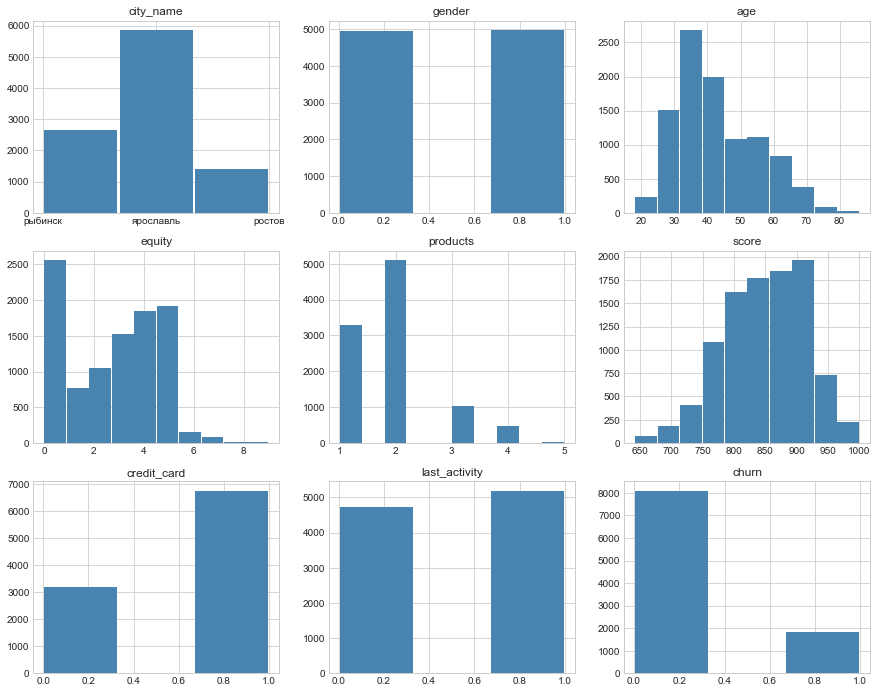

In [28]:
# список столбцов по которым строим распределения
qual = ['city_name', 'gender', 'age', 'equity','products','score','credit_card', 'last_activity', 'churn',]

# цикл строит блок графиков
for i in range(len(qual)):
    plt.subplot(3,3,i+1)
    # конструкция if-else настройки корзин по количеству уникальных значений
    if data[qual[i]].nunique() <= 3:
        data[qual[i]].hist(
            bins=3,
            rwidth=.97,
            figsize=(15,12),
            color=color
          )
    else:
        data[qual[i]].hist(
            rwidth=.97,
            figsize=(15,10),
            color=color
          )
    plt.title(qual[i])
plt.show()

Проанализировав распределения можно сделать следующие выводы:
•	Больше всего клиентов в Ярославле, меньше всего в Ростове.
•	Мужчины и женщины распределены одинаково.
•	Больше всего клиентов среднего возраста - 30–40 лет. Чем старше клиенты, тем меньше их количество.
•	Баллы собственности чаще всего 0, далее идут по нарастающей до 6.
•	У большинства клиентов 2 продукта, немного реже 1.
•	У большинства клиентов кредитный рейтинг составляет 800–900 баллов.
•	Чаще всего у клиентов есть кредитная карта.
•	Последняя активность немного больше, чем без активности.
•	Около 18% клиентов ушло.
Далее построим гистограммы по непрерывным данным.


,min,max,50%,mean,std
balance,0.0,1.191136e+08,524927.74,828206.27,1984121.61
est_salary,2546.3,1.395064e+06,119719.33,147892.55,139359.86


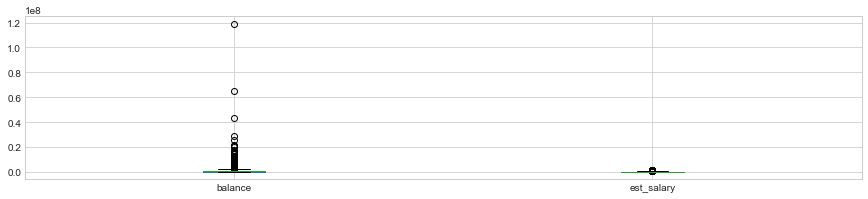

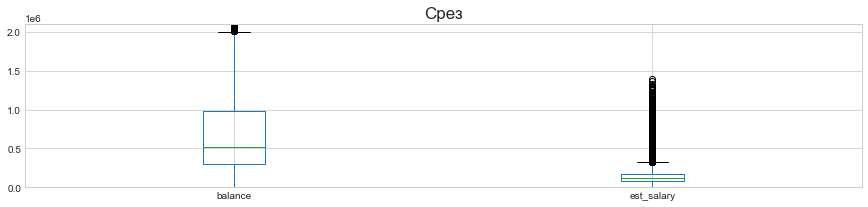

In [29]:
# список столбцов с непрерывными значениями по которым строим расрпделения
quan = ['balance','est_salary']
# создаём таблицу с описанием данных
display(
    round(data[quan]
          .describe()
          .T[[
              'min', # мин. значение
              'max', # макс. значение
              '50%', # медиана
              'mean', # среднее
              'std' # стандартное отклонение
              ]], 2
          )
    )
# первый график
plt.figure(figsize=(15, 3))
data[quan].boxplot()
# второй график (срез данных)
plt.figure(figsize=(15, 3))
data[quan].boxplot()
plt.title("Срез", size=17)
plt.ylim(0,2100000)
plt.show()

На диаграммах размаха мы видим распределения по столбцам с непрерывными значениями. В столбце с информацией о предположительной зарплате клиентов присутствуют немало выбросов, но в столбце с информацией о балансе присутствуют сильные выбросы, которые значительно увеличивают размах значений.

##### 2.5.2 Категоризация

Для более точной категоризации обычное распределение значений может не подойти. Для этого разделим на первичные категории значения в столбцах, содержащие информацию о возрасте, балансе, зарплате и рейтингу клиентов. Далее посчитаем долю оттока для каждой первичной категории и определим конечные категории по первичным, доли оттока которых превышают общую долю оттока по банку.

In [30]:
# высчитываем общую долю оттока по банку
total_outflow_share = (
    round(
        (data.query('churn == 1')['user_id'].count() / data['user_id'].count()) * 100
        )
)
# проверка
print(f'Общая доля оттока клиентов по банку: {total_outflow_share}')

Общая доля оттока клиентов по банку: 18


**Функции**

In [31]:
def get_agg(col, border):
    '''
    Функция аггрегирует данные в отдельную таблицу,
    в которой будут записаны количество всех клиентов,
    отточных клиентов и процентная доля отточных клиентов.
    '''
    if col == 'age':
        df = data
    if col == 'bl_cat':
        df = data.query(f'balance <= {border}')
    if col == 'sal_cat':
        df = data.query(f'est_salary <= {border}')
    if col == 'score_cat':
        df = data

# группировка ВСЕХ клиентов по столбцу
    all_age_dist = (
        df
        .groupby(col)['user_id']
        .count()
        .reset_index()
        .rename(columns={'user_id':'count'})
  )
# группировка ОТТОЧНЫХ клиентов по столбцу
    churn_age_dist = (
        df
        .query('churn == 1')
        .groupby(col)['user_id']
        .count()
        .reset_index()
        .rename(columns={'user_id':'churn_count'})
      )
  # соединям таблицы
    churn_share = (
        all_age_dist
        .merge(
          churn_age_dist, on=col, how='left'
          )[[col,'count','churn_count']]
      )
  # находим долю отточных
    churn_share['share'] = round(
      churn_share['churn_count'] / churn_share['count'] * 100, 2
      )
  # вывод
    return churn_share

In [32]:
def get_plot(df):
    '''
    Функция создаёт линейную диаграмму распределения доли отточных клиентов по переменному признаку по раннее
    агрегированной таблице
    '''
    plt.figure(figsize=(20,7))
    sns.lineplot(
    data=df,
    x=df.columns[0],
    y='share',
    color=color,
    marker='o'
    )
    # красная горизонтальная линия
    plt.axhline(y=total_outflow_share, color='red', linestyle='--')

    plt.ylabel('Доля оттока', size=13)

      # подписи к осям в зависимости от признака
    if df.columns[0] == 'age':
        plt.title('Распределение уровня оттока клиента по возрасту', size=16)
        plt.xlabel('Возраст', size=13)
        plt.text (63, 19, 'Общ.ур.оттока ~18%', color='r')

    if df.columns[0] == 'bl_cat':
        plt.title('Распределение уровня оттока клиента по балансу', size=16)
        plt.xlabel('Категории', size=13)
        plt.text (150000, 19, 'Общ.ур.оттока ~18%', color='r')

    if df.columns[0] == 'sal_cat':
        plt.title('Распределение уровня оттока клиента по зарплате', size=16)
        plt.xlabel('Категории предположительной зарплаты', size=13)
        plt.text (25000, 18.5 , 'Общ.ур.оттока ~18%', color='r')

    if df.columns[0] == 'score_cat':
        plt.title('Распределение уровня оттока клиента по рейтингу', size=16)
        plt.xlabel('Категории кредитного скоринга', size=13)
        plt.text (725, 19, 'Общ.ур.оттока ~18%', color='r')

In [33]:
def get_upper_border(val):
    '''
    функция находит верхнюю границу "уса" диаграммы размаха
    '''
    # переменные
    q1 = np.percentile(val, 25)
    q3 = np.percentile(val, 75)
    k = 1.5
    # формула
    x2 = q3 + k*(q3 - q1)
    return round(x2)

In [34]:
def get_stem(agg_df):
    '''
    Функция строит стемплот по входящей таблице
    '''
    # значения для автоматической подписи необходимых координат
    share_border = agg_df.query('share >= 18')
    
    plt.figure(figsize=(20,8))  
    # строим стемплот
    plt.stem(
          agg_df[agg_df.columns[0]], agg_df['share'], linefmt='grey', bottom=18
          )
    # оформляем 
    ticks = share_border[share_border.columns[0]].astype('int')
    plt.xticks(ticks=ticks, labels=ticks, size=13)
    plt.grid(linestyle=':')
    #
    if agg_df.columns[0] == 'age':
        plt.title('Распределение уровня оттока клиента по возрасту', size=18)
        plt.xlabel('Возраст', size=14)
        plt.text (78, 19, 'Общ.ур.оттока ~18%', color='r', size=16)
        
    if agg_df.columns[0] == 'bl_cat':
        plt.title('Распределение уровня оттока клиента по балансу', size=18)
        plt.xlabel('Категории', size=14)
        plt.text (130000, 19, 'Общ.ур.оттока ~18%', color='r', size=16)
        
    if agg_df.columns[0] == 'sal_cat':
        plt.title('Распределение уровня оттока клиента по зарплате', size=18)
        plt.xlabel('Категории предположительной зарплаты', size=14)
        plt.text (10000, 18.5 , 'Общ.ур.оттока ~18%', color='r', size=16)
        
    if agg_df.columns[0] == 'score_cat':
        plt.title('Распределение уровня оттока клиента по рейтингу', size=18)
        plt.xlabel('Категории кредитного скоринга', size=14)
        plt.text (650, 19, 'Общ.ур.оттока ~18%', color='r', size=16)   
    plt.ylabel('Доля оттока, %', size=14)
    plt.show()

По каждому признаку мы агрегируем данные, чтобы найти долю отточных клиентов для каждой категории. Затем построим график распределения долей оттока и выявим категории клиентов, доля которых превышает общую долю оттока по банку.

**Возраст**

In [35]:
# агрегация по возрасту
age_share = get_agg('age', 0)
# проверка
age_share.head()

,age,count,churn_count,share
0,18,13,1.0,7.69
1,19,16,1.0,6.25
2,20,23,3.0,13.04
3,21,15,4.0,26.67
4,22,26,4.0,15.38


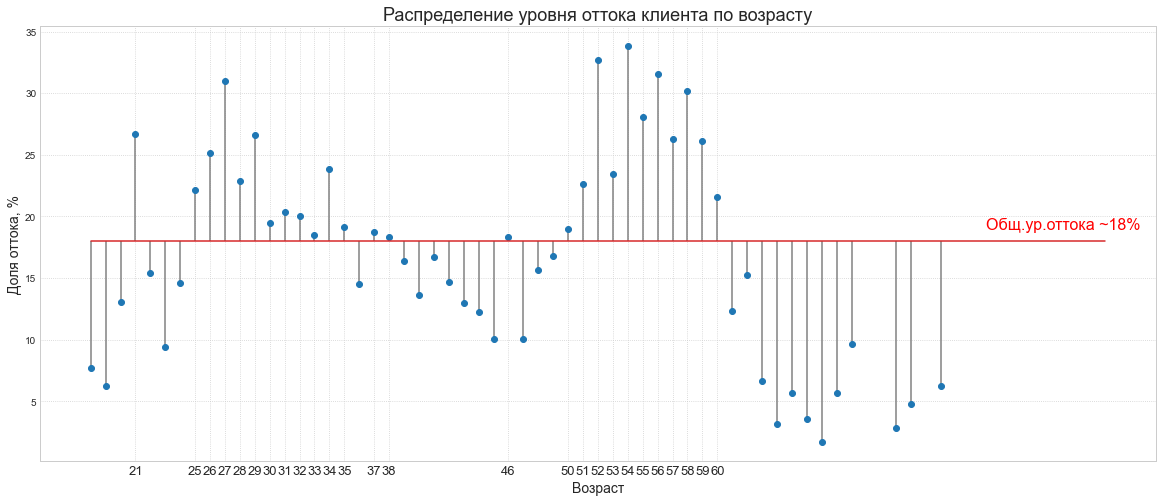

In [36]:
# визуализируем
get_stem(age_share)

По графику можно выделить следующие категории с высоким уровнем оттока:
- 1. 18 - 24 года;
- 2. 25 - 38 лет;
- 3. 50 - 60 лет.

In [37]:
# настроим конечную категоризацию
def get_age_cat(val):
    if val <= 24:
        return '18-24'
    if val >= 25 and val <= 38:
        return '25-35'
    if val > 38 and val < 50:
        return '35-50'
    if val >= 50 and val <= 60:
        return '50-60'
    if val > 60:
        return '>60'

In [38]:
# применяем функцию категоризации
data['age_cat'] = data['age'].apply(get_age_cat)
# проверка
print(
    data['age_cat'].sort_values().unique()
    )

['18-24' '25-35' '35-50' '50-60' '>60']


**Баланс**

In [39]:
# формируем срез данных без пропусков
balance = data.query('balance > 0')['balance']

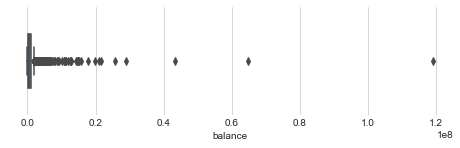

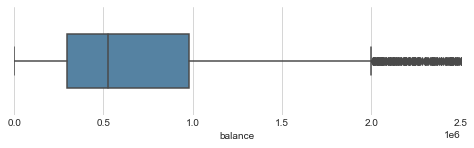

In [40]:
# рассматриваем выбросы
plt.figure(figsize=(8,2))
sns.set_style("whitegrid")
sns.boxplot(balance, orient='h',color=color, width=0.5)
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(balance, orient='h',color=color, width=0.5)
plt.xlim(0,2500000)
sns.despine(left=True, bottom=True)
plt.show()

In [41]:
# находим верхнюю границу диаграммы размаха
get_upper_border(balance)

2008672

In [42]:
# устанавливаем границу среза данных без выбросов
balance_border = 2000000

In [43]:
# функция категоризирует баланс
def get_bl_category(x):

    values = []
    for cat in range(0, 2100000, 100000):
        values.append(cat)

    for i in range(len(values)):
        while values[i] < balance_border:
            if x > values[i] and x <= values[i+1]:
                return values[i+1]
            break

In [44]:
# создаём категории баланска без выбросов
data['bl_cat'] = data.query('balance <= @balance_border')['balance'].apply(get_bl_category)
# проверка
data['bl_cat'].sort_values().unique()

array([ 100000.,  200000.,  300000.,  400000.,  500000.,  600000.,
        700000.,  800000.,  900000., 1000000., 1100000., 1200000.,
       1300000., 1400000., 1500000., 1600000., 1700000., 1800000.,
       1900000., 2000000.,      nan])

In [45]:
# агрегация по балансу
balance_share = get_agg('bl_cat', balance_border)
# проверка
balance_share.head()

,bl_cat,count,churn_count,share
0,100000.0,382,58,15.18
1,200000.0,689,111,16.11
2,300000.0,880,147,16.70
3,400000.0,948,157,16.56
4,500000.0,775,143,18.45


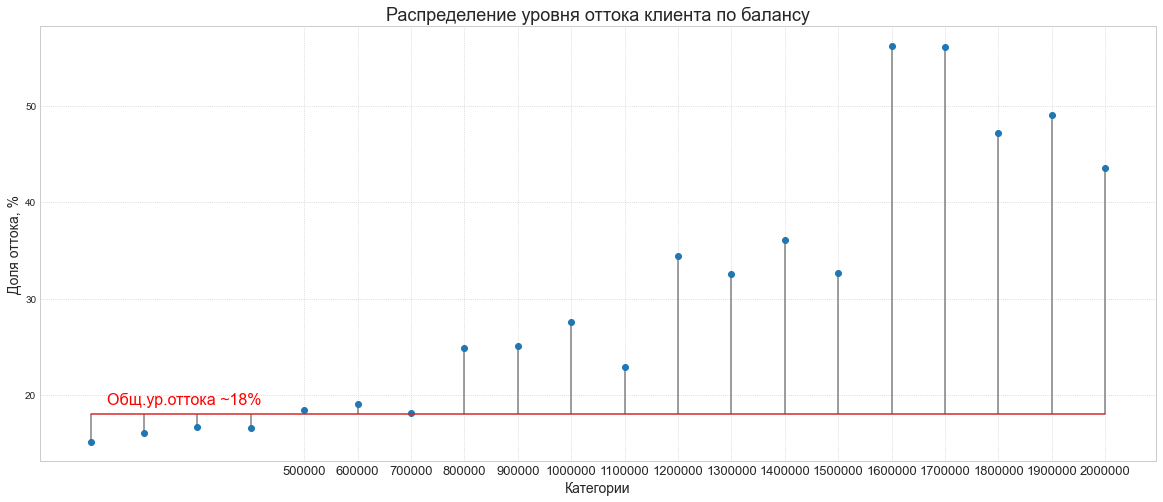

In [46]:
# визуализируем
get_stem(balance_share)

In [47]:
# настроиваем категоризацию
def get_bl_cat(val):
    if val < 500000:
        return '<500000'
    else:
        return '>500000'

In [48]:
# применяем функцию категорищации
data['bl_cat'] = data['balance'].apply(get_bl_cat)
# проверка
print(
    data['bl_cat'].sort_values().unique()
    )

['<500000' '>500000']


**Зарплата**

In [49]:
# переменная для дальнейших вычеслений
sal = data['est_salary']

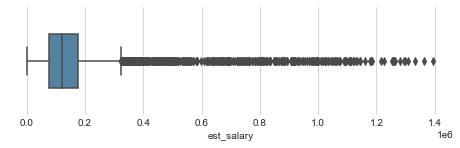

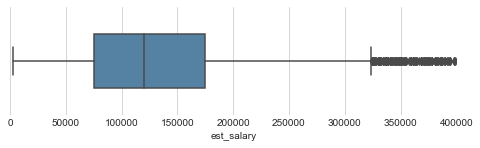

In [50]:
# рассматриваем выбросы
plt.figure(figsize=(8,2))
sns.set_style("whitegrid")
sns.boxplot(sal, orient='h',color=color, width=0.5)
sns.despine(left=True, bottom=True)
plt.show()

plt.figure(figsize=(8,2))
sns.boxplot(sal, orient='h',color=color, width=0.5)
plt.xlim(0,400000)
sns.despine(left=True, bottom=True)
plt.show()

In [51]:
# находим верхнюю границу диаграммы размаха
get_upper_border(sal)

323799

In [52]:
# устанавливаем границу среза данных без выбросов
sal_border = 320000

In [53]:
# функция категоризация
def get_sal_category(x):
    values = []
    for cat in range(0,340000, 20000):
        values.append(cat)

    for i in range(len(values)):
        while values[i] < sal_border:
            if x > values[i] and x <= values[i+1]:
                return values[i+1]
            break

In [54]:
# категоризируем
data['sal_cat'] = data.query('est_salary <= @sal_border')['est_salary'].apply(get_sal_category)
# проверка
data['sal_cat'].sort_values().unique()

array([ 20000.,  40000.,  60000.,  80000., 100000., 120000., 140000.,
       160000., 180000., 200000., 220000., 240000., 260000., 280000.,
       300000., 320000.,     nan])

In [55]:
# агрегация по зарплате
salary_share = get_agg('sal_cat', sal_border)
# проверка
salary_share.head()

,sal_cat,count,churn_count,share
0,20000.0,145,15,10.34
1,40000.0,619,84,13.57
2,60000.0,919,150,16.32
3,80000.0,1063,168,15.80
4,100000.0,1156,207,17.91


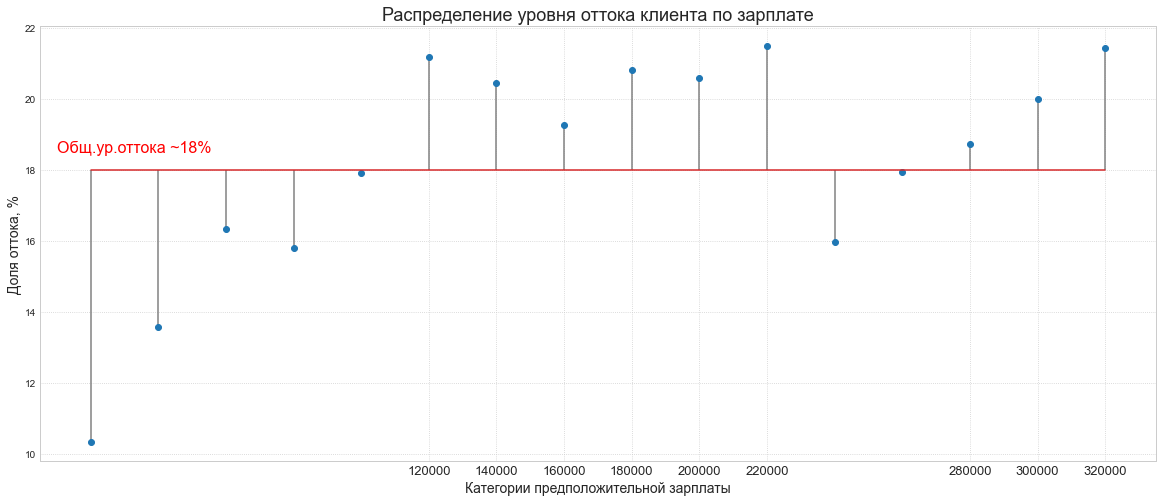

In [56]:
# визуализируем
get_stem(salary_share)

По графику можно выделить следующие категории с высоким уровнем оттока:

- 1. "от 120 000 до 220000";
- 2. "от 280000".

In [57]:
# настраиваем конечную категоризацию
def get_sal_cat(val):
    if val < 120000:
        return '< 120000'
    if val >= 120000 and val <= 220500:
        return '120000-220000'
    if val > 220000 and val <= 280000:
        return '220000-280000'
    if val > 260000:
        return '> 280000'

In [58]:
# применяем функцию категоризации
data['sal_cat'] = data['est_salary'].apply(get_sal_cat)
# проверка
print(
    data['sal_cat'].sort_values().unique()
    )

['120000-220000' '220000-280000' '< 120000' '> 280000']


**Рейтинг**

In [59]:
def get_score_category(x):
    values = []
    for cat in range(640,1020,20):
        values.append(cat)

    for i in range(len(values)):
        while values[i] < 1000:
            if x > values[i] and x <= values[i+1]:
                return values[i+1]
            break

In [60]:
# применяем функцию категоризации
data['score_cat'] = data['score'].apply(get_score_category)
# проверка
print(
    data['score_cat'].sort_values().unique()
    )

[ 660  680  700  720  740  760  780  800  820  840  860  880  900  920
  940  960  980 1000]


In [61]:
# агрегация по рейтингу
score_share = get_agg('score_cat', 0)
# проверка
score_share.head()

,score_cat,count,churn_count,share
0,660,57,NaN,NaN
1,680,29,NaN,NaN
2,700,91,NaN,NaN
3,720,133,2.0,1.50
4,740,224,8.0,3.57


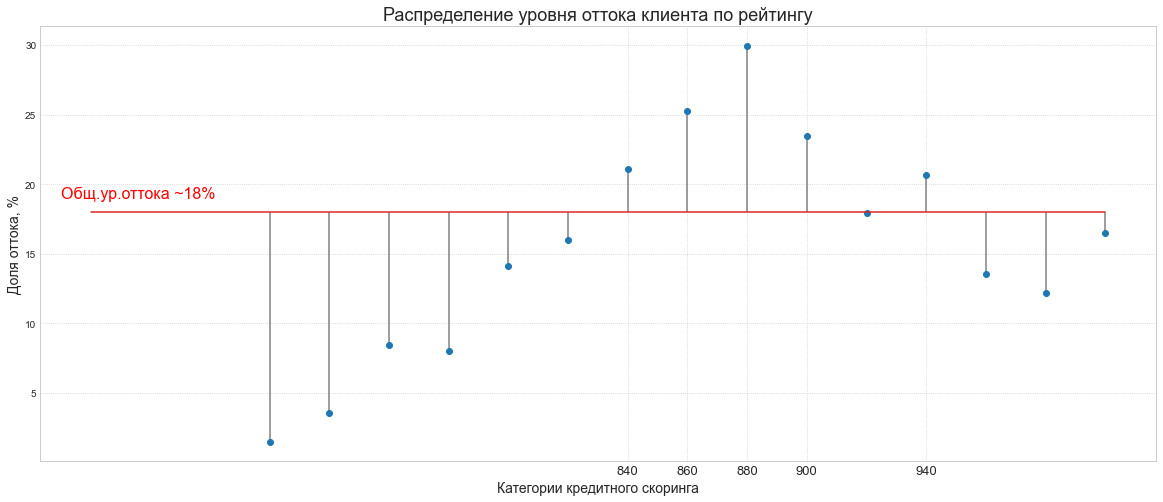

In [62]:
# визуализируем
get_stem(score_share)

По графику можно выделить следующие категории с высоким уровнем оттока:

- 1. "до 840";
- 2. "от 860 до 940";
- 3. "от 940".

In [63]:
# настроиваем конечную категоризацию
def get_score_cat(val):
    if val < 840:
        return '< 840'
    if val >= 828 and val <= 947:
        return '840-940'
    if val > 947:
        return '> 940'

In [64]:
# применяем функцию категоризации
data['score_cat'] = data['score'].apply(get_score_cat)
# проверка
print(
    data['score_cat'].sort_values().unique()
    )

['840-940' '< 840' '> 940']


После проведения предварительной обработки данных мы исправили названия столбцов, убрали пропущенные значения и привели форматы данных к одному типу. Кроме того, мы удалили дубликаты записей. Также рассмотрели распределения и провели категоризацию признаков для более точного анализа. Теперь мы готовы к дальнейшему анализу данных.

## 3. Исследовательский анализ

#### 3.1 Портреты клиентов

Сформируем и сравним портреты клиентов, тех кто ушел и тех кто остался.

In [65]:
# средение значения отточных и оставшиешся клиентов
(
    data
    .groupby('churn')
    .mean()
    .round(2)
    .T
    ).style.background_gradient()

churn,0,1
score,845.440000,863.360000
gender,0.470000,0.650000
age,43.020000,41.430000
equity,2.380000,3.760000
balance,733789.920000,1134458.210000
products,1.760000,2.380000
credit_card,0.710000,0.550000
last_activity,0.480000,0.700000
est_salary,147788.270000,148357.480000
rostov,0.140000,0.150000


In [66]:
# формируем срез клиентов, которые ушли (отток)
churn = data.query('churn == 1').drop('churn', axis = 1)

# проверка
churn.sample(5)

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,city_name,rostov,rybinsk,yaroslavl,age_cat,bl_cat,sal_cat,score_cat
6342,219040,821,1,36,7,330762.44,4,1,1,71874.96,рыбинск,0,1,0,25-35,<500000,< 120000,< 840
8350,209895,938,0,44,0,32629.76,1,1,1,85900.77,ярославль,0,0,1,35-50,<500000,< 120000,840-940
4824,122467,826,0,51,5,1199448.02,1,1,1,473642.08,рыбинск,0,1,0,50-60,>500000,> 280000,< 840
5708,162331,916,1,50,5,4362619.72,4,1,1,1022536.72,ярославль,0,0,1,50-60,>500000,> 280000,840-940
9887,167524,856,1,50,3,265390.36,2,1,1,154039.56,ярославль,0,0,1,50-60,<500000,120000-220000,840-940


In [67]:
# формируем срез клиентов, которые остались
loyal = data.query('churn == 0').drop('churn', axis = 1)

# проверка
display(loyal.sample(5))

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,city_name,rostov,rybinsk,yaroslavl,age_cat,bl_cat,sal_cat,score_cat
8628,130978,785,0,74,0,NaN,1,1,1,763312.64,ярославль,0,0,1,>60,>500000,> 280000,< 840
3979,215702,840,1,35,5,700432.46,3,1,0,175896.13,ярославль,0,0,1,25-35,>500000,120000-220000,840-940
3212,225733,955,1,24,0,14674.32,2,0,1,129732.61,рыбинск,0,1,0,18-24,<500000,120000-220000,> 940
3752,220936,781,0,74,3,900284.46,2,0,1,34537.18,рыбинск,0,1,0,>60,>500000,< 120000,< 840
2309,186938,889,0,73,4,575819.44,3,0,0,24608.76,ярославль,0,0,1,>60,>500000,< 120000,840-940


In [68]:
def get_hist(bins):
    '''
функция строит блоки парных гистограм с лояльными и отчными клиентами по признакам
    '''
    sns.set_style("whitegrid")
    # 2 отдельные гистрограммы с лольными и отточными клиентами, которые накладываются друг на друга
    sns.histplot(
        data=loyal[col[i]], label='loyal', bins=bins, common_bins=True, color='#86bf91'
    )
    sns.histplot(
        data=churn[col[i]], label='churn', bins=bins, common_bins=True, color='#e23b52'
    )
    # оформление
    plt.title('Распределение ' + col[i], size=15)
    plt.xlabel(col[i], size=10)
    plt.ylabel('Частота', size=10)
    sns.despine(left=True)
    plt.legend()
    if col[i] == 'products':
        ticks = data['products'].unique()
        plt.xticks(ticks=ticks, labels=ticks, size=10)
    if col[i] == 'equity':
        ticks = data['equity'].unique()
        plt.xticks(ticks=ticks, labels=ticks, size=10)
    if col[i] in ['gender','credit_card','last_activity']:
        ticks = [0, 1]
        plt.xticks(ticks=ticks, labels=ticks, size=10)

In [69]:
# удаляем столбцы которые не подойдут для гистограмм
col = loyal.drop(['user_id','age','balance','est_salary','score','rostov','rybinsk','yaroslavl'], axis=1).columns
# проверка
list(col)

['gender',
 'equity',
 'products',
 'credit_card',
 'last_activity',
 'city_name',
 'age_cat',
 'bl_cat',
 'sal_cat',
 'score_cat']

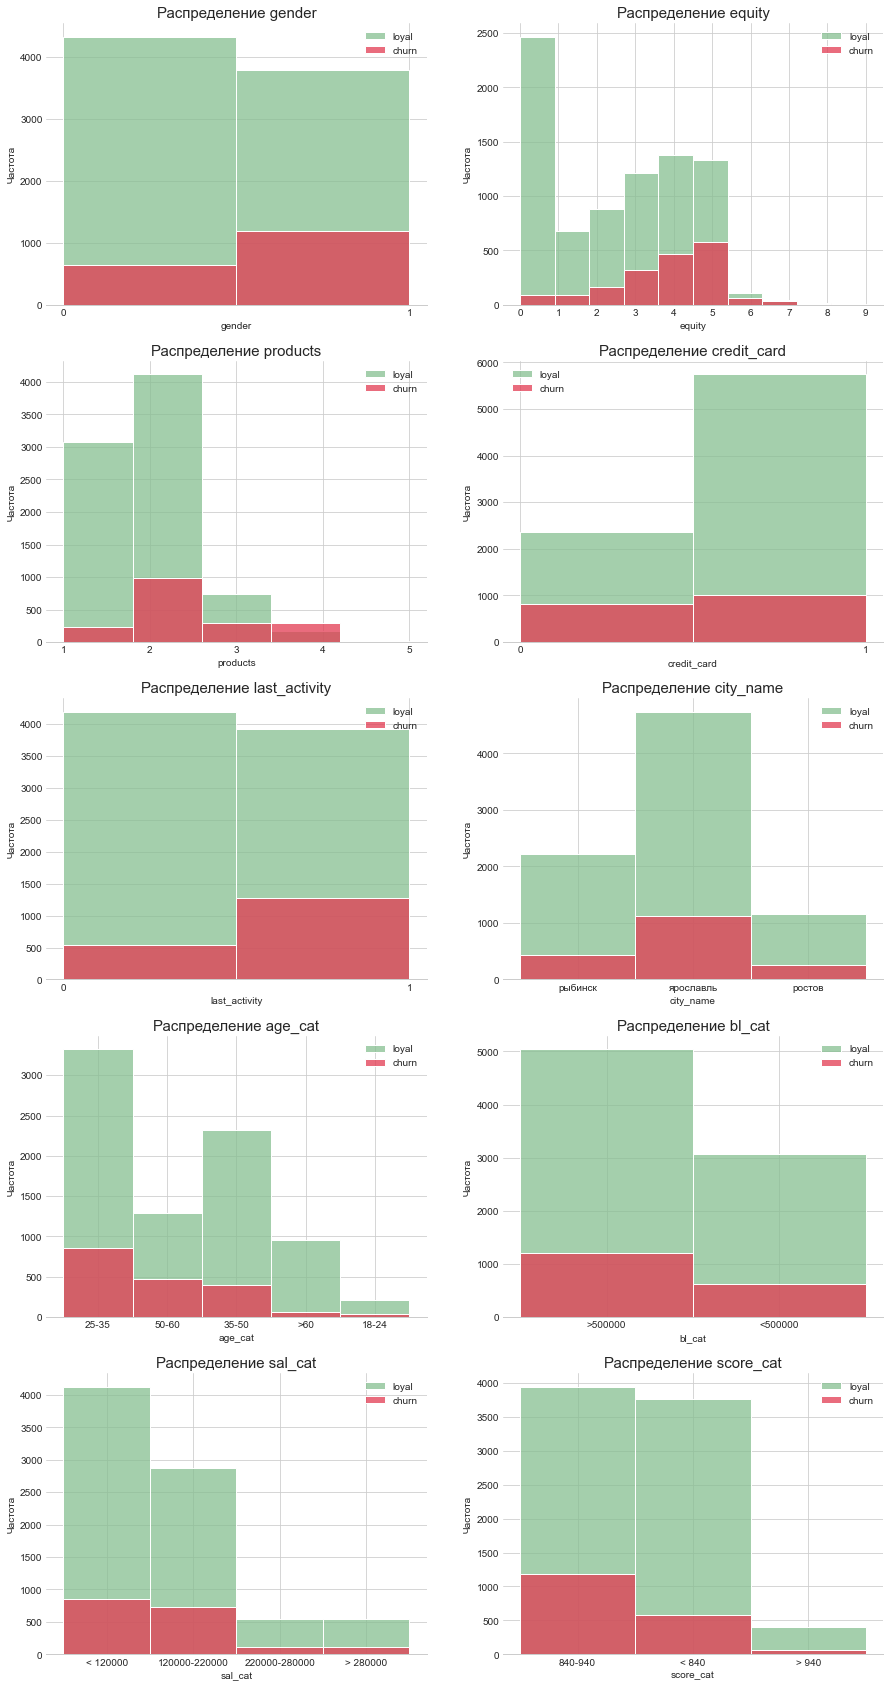

In [70]:
# размеры графика
plt.figure(figsize=(15, 30))
# цикл строит гистограммы по признаку с разным количеством корзин
for i in range(len(col)):
    plt.subplot(5,2,i+1)
    if data[col[i]].nunique() <= 10:
        get_hist(data[col[i]].nunique())
    else:
        get_hist(int(data[col[i]].nunique() / 10))
plt.show()

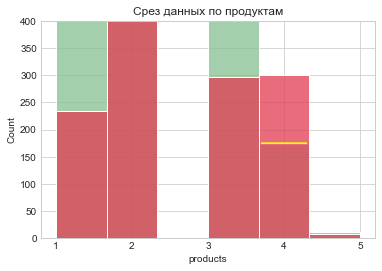

In [71]:
# отдельный срез по продуктам
sns.set_style("whitegrid")
sns.histplot(
        data=loyal['products'], label='loyal', bins=6, common_bins=True, color='#86bf91'
    )
sns.histplot(
        data=churn['products'], label='churn', bins=6, common_bins=True, color='#e23b52'
    )
plt.gca().add_patch(plt.Circle((4, 175), 0.3, color='yellow'))
plt.title('Срез данных по продуктам')
plt.ylim(0,400)
ticks = data['products'].unique()
plt.xticks(ticks=ticks, labels=ticks, size=10)
plt.show()

Проанализировав гистограммы, пришли к следующим выводам:

- Женщин больше, но мужчины уходят чаще;

- Количество клиенов больше всего без очков собственности. У них же и меньше всего доля ухода. Чем больше очков собственности, тем больше доля ухода;

- Самая частое количество продуктов у клиентов – 2. Высокие доли ухода у клиентов с 4 и более продуктами. Самая большая доля у клиентов с 4 продуктами. Количество отточных сильно превышает, количество оставшиеся;

- Кредитная карта, больше всего клиентов с кредитной картой. количество оттока практически одинаковая, но доля отточных клиентов без кредитной карты выше;

- Активность примерно одинаковая, но доля оттока с последней активностью намного выше;

- Больше всего клиентов с Ярославля и самое большое количество клиентов с Ярославля, но процент оттока выше в Ростове;

- По возрасту больше всего по количеству у категории клиентов 25-35 лет. Большая доля оттока клиентов 50-60 лет. Меньше всего доля оттока у клиентов старше 60;

- Чаще всего баланс клиентов состовляет более 500000, доля оттока примерно одинаковая;

- Чаще всего уровень предпологаемой заработной платы клиентов стовлет до 120000, но самая большая доля оттока у клиентов с зарплатой от 120000 по 220000;

- Больше всего клиентов имеют кредитный рейтинг от 840 по 940. Доля оттока таких клиентов тоже самая высокая.

- При 4 оформленных продуктах отточных клиентов больше, чем оставшиеся.

Подведя итоги, выделим следующие проблемные категории:

- мужчины;
- без кредитной карты;
- 25–35 лет и 50–60  лет;
- баланс больше 500000;
- предположительная зарплата 120000-240000 и больше 260000;
- c двумя и более оформленных продуктов;
- от трёх баллов собственности;
- рейтинг 840–940;
- из Ярославля.

#### 3.2 Корреляция

Далее посчитаем корреляцию между столбцами и рассмотри её с помощью тепловой карты.

In [73]:
# создаём матрицу корреляции
cm_churn = round(data.corr(), 2)

# из матрицы выделяет только тсолбце churn и заливаем градиентом.
pd.DataFrame(
        cm_churn['churn']
).drop(index='churn').style.background_gradient(cmap="Reds")

,churn
score,0.110000
gender,0.140000
age,-0.050000
equity,0.270000
balance,0.090000
products,0.300000
credit_card,-0.130000
last_activity,0.170000
est_salary,0.000000
rostov,0.000000


После подсчёта корреляции столбца churn с другими столбцами датафрейма, можно сделать вывод, что из всех признаков на уход больше всего влияют количество продуктов, баллов собственности и совсем немного признак последней активности за месяц. Соответственно, **чем больше баллов собственности и количество продуктов, тем выше уход.**

#### 3.3 Статистический анализ

Сформулируем и проверим несколько статистических гипотез относительно представленных данных, которые поможет внести ясность в исследование. Ранее мы рассматривали корреляцию признака оттока с другими признаками клиентов. Можем предположить, что баланс, предполагаемая заработная плата и кредитный рейтинг отличаются у клиентов, которые ушли, от клиентов, которые остались. До начала проверки сформулируем нулевую и альтернативные гипотезы:
> **Нулевая гипотеза**: у лояльных и отточных клиентов уровень баланса, уровень дохода и кредитный рейтинг одинаковые.

> **Альтернативная гипотеза**: у лояльных и отточных клиентов уровень баланса, уровень дохода и кредитный рейтинг разные.

Далее сформируем необходимые выборки без выбросов, проверим их распределения на нормальность и посмотрим на их размеры.

In [74]:
# формируем выборки лояльных и ушедших клиентов по следующим признакам:

# баланс
bl_dist_0 = data.query('churn == 0 and balance <= 2000000')['balance']
bl_dist_1 = data.query('churn == 1 and balance <= 2000000')['balance']
# зарплата
sal_dist_0 = data.query('churn == 0 and est_salary <= 320000')['est_salary']
sal_dist_1 = data.query('churn == 1 and est_salary <= 320000')['est_salary']
# рейтинг
score_dist_0 = data.query('churn == 0')['score']
score_dist_1 = data.query('churn == 1')['score']

In [75]:
# првоерим размеры выборок
print(
    'Размеры выборок:',
    ' ',
    f'Баланс лояльных кл. = {bl_dist_0.count()}',
    f'Баланс ушедших кл. = {bl_dist_1.count()}',
    ' ',
    f'Зарплата лояльных кл.  = {sal_dist_0.count()}',
    f'Зарплата ушедших кл. = {sal_dist_1.count()}',
    ' ',
    f'Рейтинг лояльных кл. = {score_dist_0.count()}',
    f'Рейтинг ушедших кл. = {score_dist_1.count()}',
    sep='\n'
)

Размеры выборок:
 
Баланс лояльных кл. = 5641
Баланс ушедших кл. = 1596
 
Зарплата лояльных кл.  = 7694
Зарплата ушедших кл. = 1738
 
Рейтинг лояльных кл. = 8105
Рейтинг ушедших кл. = 1818


Выборки имеют достаточно большое количество значений для проведения двухвыборочный t-теста. Так как размеры выборок не равны между собой, мы можем предположить, что их дисперсии также могут отличаться, поэтому необходимо скорректировать статистический тест. Прежде чем проводить t-тест для сравнения средних, мы должны проверить распределение выборок на нормальность.

In [76]:
def get_kde(sample_1, sample_2, val):
    '''
    Функция строит совместный график распределения значений по двум выборкам.
    '''
    plt.figure(figsize=(15,3))
    # общий график для двух выборок, ушедших клиентов и оставшихся
    sns.kdeplot(data=sample_1, color='green')
    sns.kdeplot(data=sample_2, color='red')
    # оформление
    plt.title(f'Распределение {val}', size=15)
    plt.ylabel('Плотность', size=12)
    if val == 'balance':
        plt.xlabel('Баланс', size=12)
    if val == 'est_salary':
        plt.xlabel('Зарплата', size=12)
    if val == 'score':
        plt.xlabel('Рейтинг', size=12)
    sns.despine(left=True, top=True)
    plt.grid(False)
    plt.show()

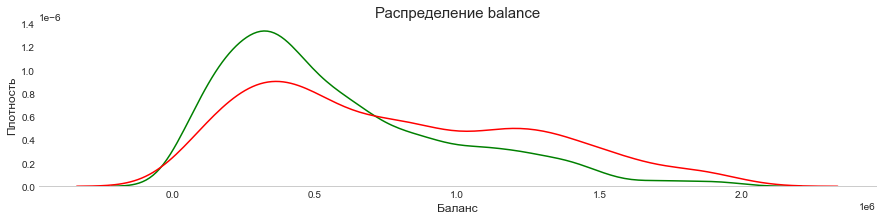

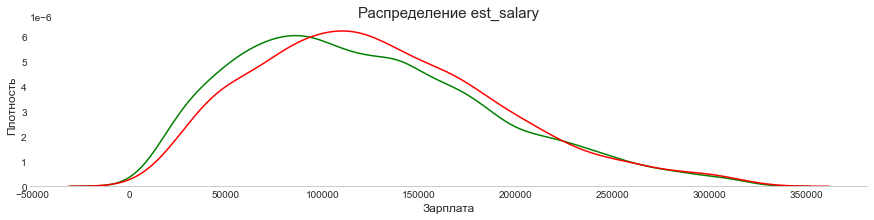

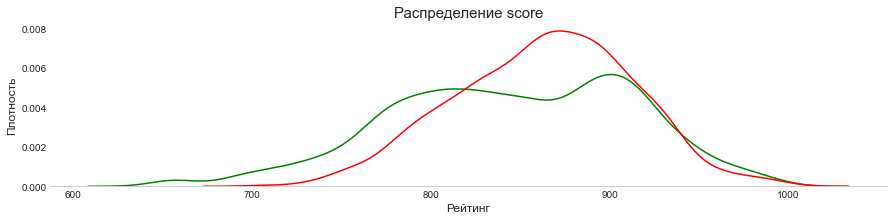

In [77]:
# строим совместные графики по трём признакам
get_kde(bl_dist_0, bl_dist_1, 'balance')
get_kde(sal_dist_0, sal_dist_1, 'est_salary')
get_kde(score_dist_0, score_dist_1, 'score')

На графиках распределения значений разных признаков мы наблюдаем, что распределения, обозначенные зеленым цветом (лояльные клиенты) и красным (ушедшие клиенты) распределены нормально со смещениями вправо у распределений баланса и зарплаты, и со смещением влево у распределения рейтинга. Далее перейдем к проведению самих тестов.

In [78]:
def run_test(sample_1, sample_2):
    '''
    функция агрегирует данные и проводит ряд статистических тестов
    '''
    # уровень статистической значимости
    alpha = .05

    # проведение t-теста
    '''
    Так как дисперсии двух выборок предположительно разные,
    устанавлием параметр equal_var=False
    '''
    results = st.ttest_ind(sample_1, sample_2, equal_var=False)

    # вывод результатов
    print(
        f'Среднее по лояльным клиентам = {round(sample_1.mean(), 2)}',
        f'Среднее по ушедшим клиентам = {round(sample_2.mean(), 2)}',
        ' ',
        f'p-values = {results.pvalue}',
        sep='\n'
        )

  # автоматический комментарий по результату теста
    if results.pvalue < alpha:
        print(font.BOLD,'Отвергаем нулевую гипотезу',font.END)
    else:
        print(font.BOLD,'Не получилось отвергнуть нулевую гипотезу',font.END)

In [79]:
# тест по балансу
run_test(bl_dist_0, bl_dist_1)

Среднее по лояльным клиентам = 570555.9
Среднее по ушедшим клиентам = 766727.87
 
p-values = 1.609103123863959e-46
 Отвергаем нулевую гипотезу 


In [80]:
# тест по зарплате
run_test(sal_dist_0, sal_dist_1)

Среднее по лояльным клиентам = 121916.64
Среднее по ушедшим клиентам = 128633.07
 
p-values = 6.344699802971627e-05
 Отвергаем нулевую гипотезу 


In [81]:
# тест по рейтингу
run_test(score_dist_0, score_dist_1)

Среднее по лояльным клиентам = 845.44
Среднее по ушедшим клиентам = 863.36
 
p-values = 2.1836357574133553e-37
 Отвергаем нулевую гипотезу 


По результатам статистических тестов, с большей вероятностью стоит опровергнуть нулевые гипотезы, то есть мы будем ориентироваться на тот факт, что уровень баланса, зарплаты и кредитного рейтинга у лояльных клиентов и у ушедших скорее всего разный. 

В начале анализа мы рассмотрели различия значений признаков клиентов, которые ушли, и клиентов, которые остались, и выделили следующие признаки отточности:
- мужчины;
- без кредитной карты;
- 25–35 лет и 50–60  лет;
- баланс больше 500000;
- предпол.зарплата 120000-240000 и больше 260000;
- рейтинг 840–940;
- из Ярославля.

Далее рассчитав и рассмотрев корреляцию признаков, мы сделали следующие выводы:
- чем больше заработная плата, тем больше баланс;
- чем больше баллов собственности и количество продуктов, тем выше уход.

И наконец проведя ряд статистических тестов и рассматривая результаты вместе с предыдущими выводами о портретах клиентов, следует предположить, что уровень баланса, зарплаты и кредитного рейтинга у лояльных клиентов и у ушедших разный. 

## 4. Сегментация

Для формирования сегментов переберём признаки отточности, которые мы определили ранее, друг с другом и рассчитаем долю оттока. Для этого нам понадобится создать датафрейм.

Для создания датафрейма, переберём признаки отточности с помощью циклов друг с другом и посчитаем общее количество клиентов по этим признакам, количество ушедших клиентов по этим признакам и долю оттока клиентов по тем же признакам. формировать названия и считать количества будем пошагаво, записывая всё в отдельные списки. После из списков, сформируем таблицу.

1. Названия строк

In [82]:
# переберем признаки и запишем наименования комбинаций в пустой список
traits_name = []
# признаки
trais = [
    'мужчины',
    'без кредитки',
    'с активностью',
    'с собств.больше 2',
    'с продуктами больше 2',
    '50-60 лет',
    'c балансом больше 500000',
    'c зп 120000-220000'
    ]
# двойной цикл проходит пошагово два раза по одному списку
for name_1 in trais:
    for name_2 in trais:
    # пропускаем действие если признаки совпадают
        if name_1 == name_2:
            continue
        if name_2 == name_1:
            continue
        #
        traits_name.append(f'{name_1} {name_2}')

In [83]:
# проверка количества значений в списке
len(traits_name)

56

2. Подсчёт общего количества клиентов

In [84]:
# список признаков для пременения в конструкции query
traits_for_query = [
    'gender == 1',
    'credit_card == 0',
    'last_activity == 1',
    'equity >= 2',
    'products >= 2',
    'age_cat == "50-60"',
    'bl_cat == ">500000"',
    'sal_cat == "120000-220000"'
]
# в пустой список записываем комбинации признаков для последующих вычеслений
total_count = []

# двойной цикл проходит пошагово два раза по одному списку
for i in traits_for_query:
    for j in traits_for_query:
        # пропускаем действие если признаки совпадают
        if i == j:
            continue
        if j == i:
            continue
        # высчитываем количество клиентов с комбинацие признаков
        count = (
                  data
                  .query(f'{i} and {j}')['user_id']
                  .count()
                  )
        # результат записывем в отдельный список
        total_count.append(count)

In [85]:
# проверка количества значений в списке
len(total_count)

56

3. Подсчёт ушедших клиентов

In [86]:
# повторяем вычисления только с ушедшими клиентами
churn_count = []

for i in traits_for_query:
    for j in traits_for_query:
        if i == j:
              continue
        if j == i:
              continue

        churn = (
                  data
                  .query('churn == 1')
                  .query(f'{i} and {j}')['user_id']
                  .count()
                  )
        churn_count.append(churn)

In [87]:
# проверка количества значений в списке
len(churn_count)

56

In [88]:
# из полученных списков формируем таблицу
d = {
    'names':traits_name,
    'total_count':total_count,
    'churn_count':churn_count
    }
traits_churn = pd.DataFrame(data=d)
traits_churn['share'] = round((traits_churn['churn_count'] / traits_churn['total_count']) * 100, 2)
traits_churn

,names,total_count,churn_count,share
0,мужчины без кредитки,1299,457,35.18
1,мужчины с активностью,2569,771,30.01
2,мужчины с собств.больше 2,3217,1068,33.20
3,мужчины с продуктами больше 2,3184,1012,31.78
4,мужчины 50-60 лет,775,259,33.42
5,мужчины c балансом больше 500000,3230,786,24.33
6,мужчины c зп 120000-220000,1918,475,24.77
7,без кредитки мужчины,1299,457,35.18
8,без кредитки с активностью,1740,612,35.17
9,без кредитки с собств.больше 2,2456,763,31.07


Рассмотрим медианную долю оттока для последующей фильтрации таблицы, значения меньеш которой мы удалим.

In [89]:
# медианная доля оттока
median = traits_churn['share'].median()
median

30.015

Теперь вычислим первый квартиль в значениях количества ушедших клиентов, для последующей фитрации.

In [90]:
# первый квартиль по ушедшим клиентам
q1 = np.percentile(traits_churn['churn_count'], 25)
q1

416.5

Отфильтровываем результаты, в которых количество клиентов меньше значения первого квартиля и доля оттока ниже медианной. Также удалим обнаруженные дубликаты по доли оттока, так как одни и те же признаки комбинировались в разном порядке два раза.

In [91]:
# фильтрация
traits_churn_filtr = (
    traits_churn
    .query('churn_count >= @q1 and share >= @median')
    .drop_duplicates(subset='share')
    .sort_values(by='share', ascending=False)
    )
traits_churn_filtr

,names,total_count,churn_count,share
0,мужчины без кредитки,1299,457,35.18
8,без кредитки с активностью,1740,612,35.17
16,с активностью с собств.больше 2,3406,1175,34.50
25,с собств.больше 2 50-60 лет,1213,417,34.38
2,мужчины с собств.больше 2,3217,1068,33.20
17,с активностью с продуктами больше 2,3449,1122,32.53
3,мужчины с продуктами больше 2,3184,1012,31.78
9,без кредитки с собств.больше 2,2456,763,31.07
26,с собств.больше 2 c балансом больше 500000,3937,1182,30.02


Для более точного формулирования сегментов, полученные комбинации скомбинируем еще по одному списку признаков.

Второй "тур" комбинирования.
1. Названия строк

In [92]:
# список полученных ранее наименований комбинаций
traits_name_2 = [
    'мужчины без кредитки',
    'без кредитки с активностью',
    'от 2 объектов с активностью',
    'мужчины от 2 объектов',
    'с активностью от 2 продуктов',
    'мужчины от 2 продуктов,',
    'без кредитки от 2 объектов',
    'мужчины с активностью',
    'от 2 объектов баланс больше 500000'
]

# список с новыми признаками
trait_name_3th = [
    'мужчины',
    'без кредитки',
    'с активностью',
    'от 2 объектов',
    'от 2 продуктов',
    'баланс больше 500000'
    ]
# записываем наименования новых комбинаций в пустой список
new_traits_name = []
# запускаем двойной цикл, который записывает наименования кобинаций признаков
for name_3 in traits_name_2:
    for name_4 in trait_name_3th:
        new_traits_name.append(f'{name_3} {name_4}')

In [93]:
# проверка количества значений в списке
len(new_traits_name)

54

2. Подсчёт общего количества клиентов

In [94]:
# список признаков для пременения в конструкции query

# список кобинаций сформулированный ранее
traits_for_query_2 = [
    'gender == 1 and credit_card == 0',
    'credit_card == 0 and last_activity == 1',
    'equity >= 2 and last_activity == 1',
    'equity >= 2 and gender == 1',
    'last_activity == 1 and products >= 2',
    'gender == 1 and products >= 2',
    'credit_card == 0 and equity >= 2',
    'last_activity == 1 and gender == 1',
    'equity >= 2 and bl_cat == ">500000"',
            ]
# новый список на основе резултатов комбинации
trait_for_query_3th = [
    'gender == 1',
    'credit_card == 0',
    'last_activity == 1',
    'equity >= 2',
    'products >= 2',
    'bl_cat == ">500000"'
]

In [95]:
# комбинируем признаки, считаем общее количество клиентов и записываем в пустой список
total_count_2 = []

for i in traits_for_query_2:
    for j in trait_for_query_3th:
        count = (
                  data
                  .query(f'{i} and {j}')['user_id']
                  .count()
                  )
        total_count_2.append(count)

In [96]:
# проверка количества значений в списке
len(total_count_2)

54

In [97]:
# комбинируем признаки, считаем количество отточных клиентов и записываем в пустой список
churn_count_2 = []

for i in traits_for_query_2:
    for j in trait_for_query_3th:
        churn_count = (
                  data
                  .query('churn == 1')
                  .query(f'{i} and {j}')['user_id']
                  .count()
                  )
        churn_count_2.append(churn_count)

In [98]:
# проверка количества значений в списке
len(churn_count_2)

54

In [99]:
# из полученных списков формируем таблицу и считаем долю оттока
d2 = {
    'names':new_traits_name,
    'total_count':total_count_2,
    'churn_count':churn_count_2
    }
traits_churn_2 = pd.DataFrame(data=d2)
traits_churn_2['share'] = round((traits_churn_2['churn_count'] / traits_churn_2['total_count']) * 100, 2)
traits_churn_2

,names,total_count,churn_count,share
0,мужчины без кредитки мужчины,1299,457,35.18
1,мужчины без кредитки без кредитки,1299,457,35.18
2,мужчины без кредитки с активностью,717,302,42.12
3,мужчины без кредитки от 2 объектов,997,440,44.13
4,мужчины без кредитки от 2 продуктов,1076,445,41.36
5,мужчины без кредитки баланс больше 500000,938,376,40.09
6,без кредитки с активностью мужчины,717,302,42.12
7,без кредитки с активностью без кредитки,1740,612,35.17
8,без кредитки с активностью с активностью,1740,612,35.17
9,без кредитки с активностью от 2 объектов,1355,580,42.80


In [100]:
q1_2 = np.percentile(traits_churn_2['churn_count'], 25)
q1_2

580.0

In [101]:
traits_churn_2_filtr = (
    traits_churn_2
    .query(f'churn_count >= {q1_2} and share >= {total_outflow_share * 2}')
    .drop_duplicates(subset='share')
    .sort_values(by='share', ascending=False)
    ).reset_index(drop=True)
traits_churn_2_filtr.style.background_gradient(subset=['total_count','churn_count','share'])

,names,total_count,churn_count,share
0,от 2 объектов с активностью мужчины,1637,714,43.620000
1,без кредитки с активностью от 2 объектов,1355,580,42.800000
2,от 2 объектов с активностью баланс больше 500000,2056,875,42.560000
3,с активностью от 2 продуктов мужчины,1624,662,40.760000
4,с активностью от 2 продуктов баланс больше 500000,1991,807,40.530000
5,без кредитки с активностью от 2 продуктов,1485,600,40.400000
6,мужчины от 2 объектов баланс больше 500000,1942,771,39.700000
7,"мужчины от 2 продуктов, баланс больше 500000",1859,710,38.190000
8,без кредитки от 2 объектов баланс больше 500000,1659,623,37.550000
9,от 2 объектов с активностью от 2 продуктов,2867,1041,36.310000


Перебрав разные признаки друг с другом, выделяем следующие сегменты:

- _Сегмент 1._ **Мужчины** с **активностью** за последний месяц, владеют от **2 объектов** собственности;

- _Сегмент 2._ С **активностью**, с большим **балансом** (от 500000), владеют от **2 объектов** собственности;

- _Сегмент 3._ С **активностью**, с большим **балансом** (от 500000), оформлено  от **2 продуктов**;

- _Сегмент 4._ **Мужчины** с большим **балансом** (от 500000), владеют от **2 объектов собственности**;

- _Сегмент 5._ С **активностью** владеют от **2 объектов** собственности, оформлено  от **2 продуктов**.

In [102]:
# фильтруем таблицу оставляя сегменты для визуализации
segments = traits_churn_2_filtr.query('index in [0,2,4,6,9]').reset_index(drop=True)
# проверка
segments['segments'] = ['Сегмент 1', 'Сегмент 2','Сегмент 3','Сегмент 4','Сегмент 5']
segments = segments[['segments','names','total_count','churn_count','share']]
segments

,segments,names,total_count,churn_count,share
0,Сегмент 1,от 2 объектов с активностью мужчины,1637,714,43.62
1,Сегмент 2,от 2 объектов с активностью баланс больше 500000,2056,875,42.56
2,Сегмент 3,с активностью от 2 продуктов баланс больше 500000,1991,807,40.53
3,Сегмент 4,мужчины от 2 объектов баланс больше 500000,1942,771,39.70
4,Сегмент 5,от 2 объектов с активностью от 2 продуктов,2867,1041,36.31


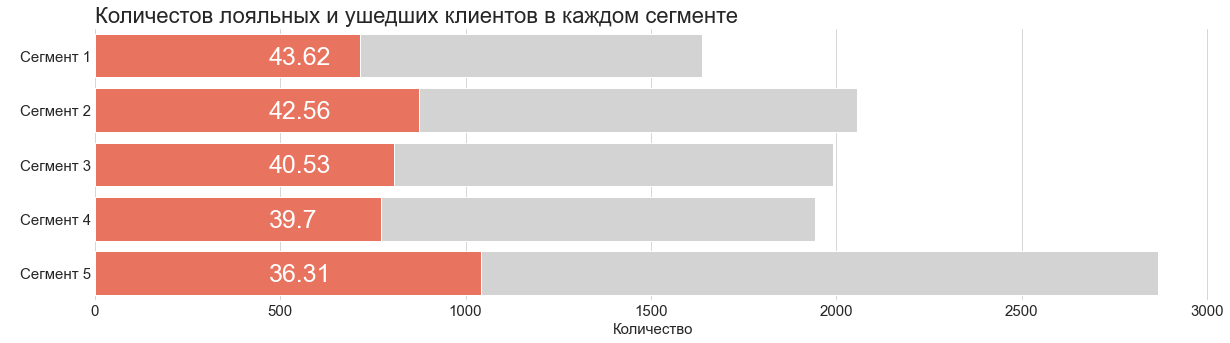

In [103]:
# визуализация
fig = plt.subplots(figsize =(20, 5))
sns.barplot(data=segments, x=segments['total_count'], y=segments['segments'], color = 'lightgrey')
sns.barplot(data=segments, x=segments['churn_count'], y=segments['segments'], color = 'tomato')
plt.title('Количестов лояльных и ушедших клиентов в каждом сегменте', size=22, loc='left')
plt.ylabel(' ')
plt.xlabel('Количество', size=15)
share = list(segments['share'])
yticks = ['Сегмент 1', 'Сегмент 2','Сегмент 3','Сегмент 4','Сегмент 5']
for i in range(len(share)):
    plt.text(470, i+0.15, share[i], color='white', size=25)
plt.xticks(size=15)
plt.yticks(size=15)
sns.despine(left=True, bottom=True)
plt.show()

## Выводы и рекомендации

#### Общие выводы

Представленный датафрейм состоит из 12 столбцов на 10000 строк и содержит информацию о клиентах разных филиалов банка и их признаков. Во время проведения предварительной обработки данных мы исправили названия столбцов, убрали пропущенные значения и привели форматы данных к одному типу. Кроме того, мы удалили дубликаты записей и рассмотрев распределения, провели категоризацию признаков с непрерывными и дискретными значениями для более точного анализа.
Далее в начале анализа мы рассмотрели различия значений признаков клиентов, которые ушли, и клиентов, которые остались, и выделили следующие признаки отточности:
- мужчины;
- без кредитной карты;
- 25–35 лет и 50–60  лет;
- баланс больше 500000;
- предположительная зарплата 120000-240000 и больше 260000;
- рейтинг 840–940;
- из Ярославля.

Потом мы рассчитали корреляцию признаков и сделали дополнительные вывод: чем больше баллов собственности и количество продуктов, тем выше уход.

Проведя ряд статистических тестов и рассматривая результаты вместе с предыдущими выводами о портретах клиентов, следует предположить, что уровень баланса, зарплаты и кредитного рейтинга у лояльных клиентов и у ушедших разный. 

И наконец во время сегментации признаков мы перебрали разные признаки друг с другом, для того чтобы выделить следующие предположительные сегменты:

- Мужчины с активностью за последний месяц, владеют от 2 объектов собственности;

- С активностью, с большим балансом (от 500000), владеют от 2 объектов собственности;

- С активностью, с большим балансом (от 500000), оформлено  от 2 продуктов;

- Мужчины с большим балансом (от 500000), владеют от 2 объектов собственности;

- С активностью, владеют от 2 объектов собственности, оформлено  от 2 продуктов.

#### Рекомендации

Мы сформулировали проблемные сегменты по признакам с большой долей оттока. Для выявления причин оттока данных сегментов в рамках данного исследования не представляется возможным, поэтому следует порекомендовать следующее:
- установить обратную связь с ушедшими клиентами из сформулированных сегментов для выявления причин и возможных проблем, с которыми могли столкнуться клиенты;
- отдельно проанализировать поведение и активность клиентов за определённое время до ухода, если обратная связь с клиентом не была установлена;
- установить специальную информационную коммуникацию об условиях, акциях и продуктах для клиентов из сформулированных сегментов, которые еще не ушли, для минимизирования риска ухода;
- при возможности разработать систему специальных предложений и поощрений для данных сегментов, для минимизирования риска ухода.